<h1><center>Challenge Advanced Regression</center></h1>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from scipy.stats import ttest_ind
import statsmodels.api as sm

%matplotlib inline
sns.set_style('darkgrid')

In [8]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_illinois_by_city_2013.xls',header = 4, skipfooter = 10)

In [9]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Addison,37378,40.0,1,NaN,8.0,5,26.0,640,97,527,16,5
1,Albany,878,0.0,0,NaN,0.0,0,0.0,5,0,5,0,0
2,Albers,1187,0.0,0,NaN,0.0,0,0.0,0,0,0,0,0
3,Albion,1975,0.0,0,NaN,0.0,0,0.0,33,8,22,3,1
4,Algonquin,29980,18.0,0,NaN,3.0,2,13.0,519,33,475,11,6


In [11]:
cols = list(df.loc[:,'City':'Arson'])
df = df[cols]
df.columns = ['City', 'Population', 'Violent_Crime',
       'Murder_manslaughter',
       'Rape1', 'Rape2',
       'Robbery', 'Agg_ass', 'Property_Crime', 'Burglary',
       'Larceny_Theft', 'Motor_Theft', 'Arson3']

In [12]:
(df.isnull().sum()/len(df))*100

City                    0.0
Population              0.0
Violent_Crime           0.2
Murder_manslaughter     0.0
Rape1                  99.8
Rape2                   0.4
Robbery                 0.0
Agg_ass                 0.2
Property_Crime          0.0
Burglary                0.0
Larceny_Theft           0.0
Motor_Theft             0.0
Arson3                  0.0
dtype: float64

In [13]:
df.dropna().shape[0]/df.shape[0]

0.0

In [14]:
if 'Rape1' in df.columns:df["Rape"] = df["Rape1"].fillna(df["Rape2"])
if 'Rape1' in df.columns: del df['Rape1']
if 'Rape2' in df.columns: del df['Rape2']
df.fillna(0, inplace=True)

In [15]:
(df.isnull().sum()/len(df))*100

City                   0.0
Population             0.0
Violent_Crime          0.0
Murder_manslaughter    0.0
Robbery                0.0
Agg_ass                0.0
Property_Crime         0.0
Burglary               0.0
Larceny_Theft          0.0
Motor_Theft            0.0
Arson3                 0.0
Rape                   0.0
dtype: float64

In [17]:
crimedata = list(df.loc[:,'Violent_Crime':])
df['Total_crimes'] = df[crimedata].sum(axis = 1)
df['Crime_per_capita']= df['Total_crimes']/df['Population']
df['Crime_per_capita'].argmax()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


415

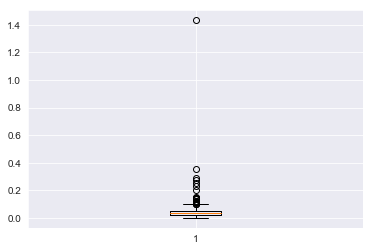

In [18]:
plt.boxplot(df['Crime_per_capita'])
plt.show()

In [19]:
df.ix[df['Crime_per_capita'].argmax()]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


City                    Sauget
Population                 155
Violent_Crime               10
Murder_manslaughter          0
Robbery                      1
Agg_ass                      4
Property_Crime             101
Burglary                     5
Larceny_Theft               87
Motor_Theft                  9
Arson3                       0
Rape                         5
Total_crimes               222
Crime_per_capita       1.43226
Name: 415, dtype: object

In [20]:
df.drop(415, inplace = True)

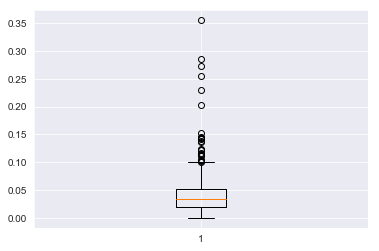

In [21]:
plt.boxplot(df['Crime_per_capita'])
plt.show()

In [22]:
df[df['Crime_per_capita']>1].Crime_per_capita.count()

0

In [23]:
df[df['Crime_per_capita']>1].index

Int64Index([], dtype='int64')

In [24]:
df['Crime_per_capita'].describe()

count    499.000000
mean       0.041832
std        0.037573
min        0.000000
25%        0.020054
50%        0.033293
75%        0.052278
max        0.354978
Name: Crime_per_capita, dtype: float64

In [25]:
df[df['Crime_per_capita']==0].Crime_per_capita.count()/len(df)

0.01603206412825651

In [26]:
df['Safe_City'] = np.where(df['Crime_per_capita']<=0.024772, 1, 0)

In [27]:
from sklearn.model_selection import train_test_split
y = df['Safe_City']
X = df[crimedata]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lr.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lr.score(X_test, y_test))

pred_y_sklearn = lr.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crime  Murder_manslaughter   Robbery   Agg_ass  Property_Crime  \
0        0.06535            -0.020569  0.054427 -0.138225       -0.052716   

   Burglary  Larceny_Theft  Motor_Theft    Arson3      Rape  
0  0.040936       0.048324    -0.141976  0.369177  0.169716  

Intercept:[0.45579598]

 Percentage accuracy training set
0.7751004016064257

 Percentage accuracy testing set
0.72

 Accuracy City Safety on Test Set
Safe_City    0   1
row_0             
0          118  36
1           34  62


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
lrlasso = LogisticRegression(penalty ='l1')
fit = lrlasso.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lrlasso.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lrlasso.score(X_test, y_test))

pred_y_sklearn = lrlasso.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crime  Murder_manslaughter   Robbery   Agg_ass  Property_Crime  \
0       0.013319                  0.0  0.094595 -0.080468       -0.002552   

   Burglary  Larceny_Theft  Motor_Theft    Arson3      Rape  
0 -0.008332      -0.001656    -0.176531  0.333932  0.204388  

Intercept:[0.39541507]

 Percentage accuracy training set
0.7831325301204819

 Percentage accuracy testing set
0.72

 Accuracy City Safety on Test Set
Safe_City    0   1
row_0             
0          120  38
1           32  60


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
lrridge = LogisticRegression(penalty ='l2')
fit = lrridge.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lrridge.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lrridge.score(X_test, y_test))

pred_y_sklearn = lrridge.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crime  Murder_manslaughter   Robbery   Agg_ass  Property_Crime  \
0       0.070187             0.007102  0.044879 -0.140854       -0.051234   

   Burglary  Larceny_Theft  Motor_Theft    Arson3     Rape  
0  0.039617       0.046949    -0.137801  0.354424  0.15906  

Intercept:[0.42478641]

 Percentage accuracy training set
0.7871485943775101

 Percentage accuracy testing set
0.716

 Accuracy City Safety on Test Set
Safe_City    0   1
row_0             
0          119  38
1           33  60


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
